# 1. Prediction of Temperature in Szeged, Hungary
## Name : Shivesh Chowdary Kodali
## UIN : 834006822

# 2. Introduction:

The dataset provides a comprehensive hourly/daily summary of weather conditions in Szeged, Hungary, spanning the years 2006 to 2016. The information includes various meteorological parameters such as temperature, apparent temperature, humidity, wind speed, and more. The primary goal of this project is to leverage the dataset to predict temperature based on other meteorological attributes. Additionally, the project aims to explore and compare real historical weather data with weather folklore, providing valuable insights into the accuracy and reliability of traditional weather knowledge.

## Objectives/Research Hypotheses:
### 1. Temperature Prediction:
 - Objective: Develop a robust predictive model for temperature using the provided meteorological attributes.
 - Hypothesis: The temperature can be accurately predicted using a combination of variables such as humidity, wind speed, and atmospheric pressure.
### 2. Generalizability of temperature prediction model:

 - Objective: Evaluate the robustness and generalizability of the temperature prediction model.
 - Hypothesis: The developed temperature prediction model will demonstrate consistent and accurate performance across different subsets of the dataset.

### 3. Impact of Atmospheric Conditions:

 - Objective: Investigate the impact of atmospheric conditions (e.g., wind speed, humidity) on temperature fluctuations.
 - Hypothesis: Certain atmospheric conditions may have a significant influence on temperature variations, and identifying these relationships can enhance our understanding of local weather patterns.

## Significance of the Project
This project holds significant importance as it strives to enhance weather prediction models in Szeged, Hungary, without relying on traditional weather folklore. The development of a robust predictive model for temperature, based on meteorological attributes, contributes to the advancement of empirical forecasting techniques. The exploration of temporal patterns and trends over the years adds depth to our understanding of local climate dynamics, shedding light on recurring cycles and abrupt changes. Additionally, the investigation into the impact of external factors and the analysis of multivariate relationships among meteorological attributes provide valuable insights into nuanced interactions within the weather system. The project's local relevance is crucial, offering tailored weather predictions for Szeged that directly inform decision-making in sectors like agriculture, transportation, and emergency management. Overall, this project serves not only as a scientific endeavor but also as a practical resource with implications for the local community, industries, and educational initiatives, without relying on traditional weather folklore.

## Background:
Weather folklore, often rooted in traditional knowledge passed down through generations, has been a longstanding method of predicting weather conditions. However, the reliability of such folklore in comparison to empirical weather data remains a subject of interest and investigation. With advancements in meteorological data collection and analysis, there is an opportunity to assess the accuracy of historical weather folklore in predicting temperature and other weather phenomena.

Szeged, Hungary, with its rich historical and cultural background, provides an excellent context for such a study. By combining real historical weather data with traditional weather knowledge, this project seeks to bridge the gap between anecdotal wisdom and scientific understanding. The findings could not only contribute to improved local weather predictions but also shed light on the broader discussion of the intersection between traditional knowledge and modern meteorology.

# 3. Data Description 

## Data Description:

Data Description:
The dataset used in this project provides a detailed hourly/daily summary of weather conditions in Szeged, Hungary, spanning the years 2006 to 2016. Each entry includes a timestamp ('time') corresponding to the observation, and various meteorological attributes that capture different aspects of the weather.


### Variables:

 - **time**: The timestamp indicating the date and time of the observation.
 - **summary**: A brief summary of the weather conditions at the given time.
 - **precipType**: The type of precipitation, if any, such as rain or snow.
 - **temperature**: The temperature in degrees Celsius.
 - **apparentTemperature**: The apparent temperature, which considers factors like wind chill.
 - **humidity**: The relative humidity as a percentage.
 - **windSpeed**: The wind speed in meters per second.
 - **windBearing**: The direction of the wind in degrees.
 - **visibility**: The visibility in kilometers.
 - **loudCover**: A numerical value indicating the extent of cloud cover.
 - **pressure**: The atmospheric pressure in hectopascals.

This dataset provides a comprehensive view of meteorological conditions over a significant timeframe, allowing for the exploration of  - temporal patterns, trends, and the development of a predictive model for temperature. The absence of external factors or traditional weather folklore ensures a focused analysis solely on empirical data. The dataset facilitates research into the dynamic interplay of various meteorological attributes and their impact on weather conditions in Szeged.

## Data Preprocessing

Demonstrate ability to handle data preprocessing tasks

Handle missing values, outliers, and any other data quality issues.
Transform variables if necessary (e.g., cleaning, normalization, encoding categorical variables).
Build a common dataset (may apply the dataset to the selected regression models).
Perform exploratory data analysis (EDA) to gain insights into the dataset characteristics.
Finding correlations, visualizing the data using different plots and charts, etc. that used in class

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/weatherHistory.csv')

In [3]:
df.shape

(96453, 12)

### Missing Values

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [5]:
# we fill missing values of precip type with mode of the variable
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [6]:
df['Precip Type'] = df['Precip Type'].fillna('rain')

In [7]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


### Handling Outliers

In [9]:
df['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [10]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:
numeric_columns = ['Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)']

cat_columns = ['Summary','Precip Type','Daily Summary']

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("pastel")
sns.set_style("whitegrid")

def plot_box(numeric_columns):
    num_cols = len(numeric_columns)
    rows = (num_cols + 1) // 2  
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 4 * rows))
    
    outliers_count = {}
    
    for i, column in enumerate(numeric_columns):
        row_num = i // 2
        col_num = i % 2
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_count[column] = len(outliers)
        
        sns.boxplot(x=df[column], ax=axes[row_num, col_num])
        axes[row_num, col_num].set_title(f'Box Plot - {column}')
    
    for i in range(num_cols, rows * 2):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()
    return outliers_count




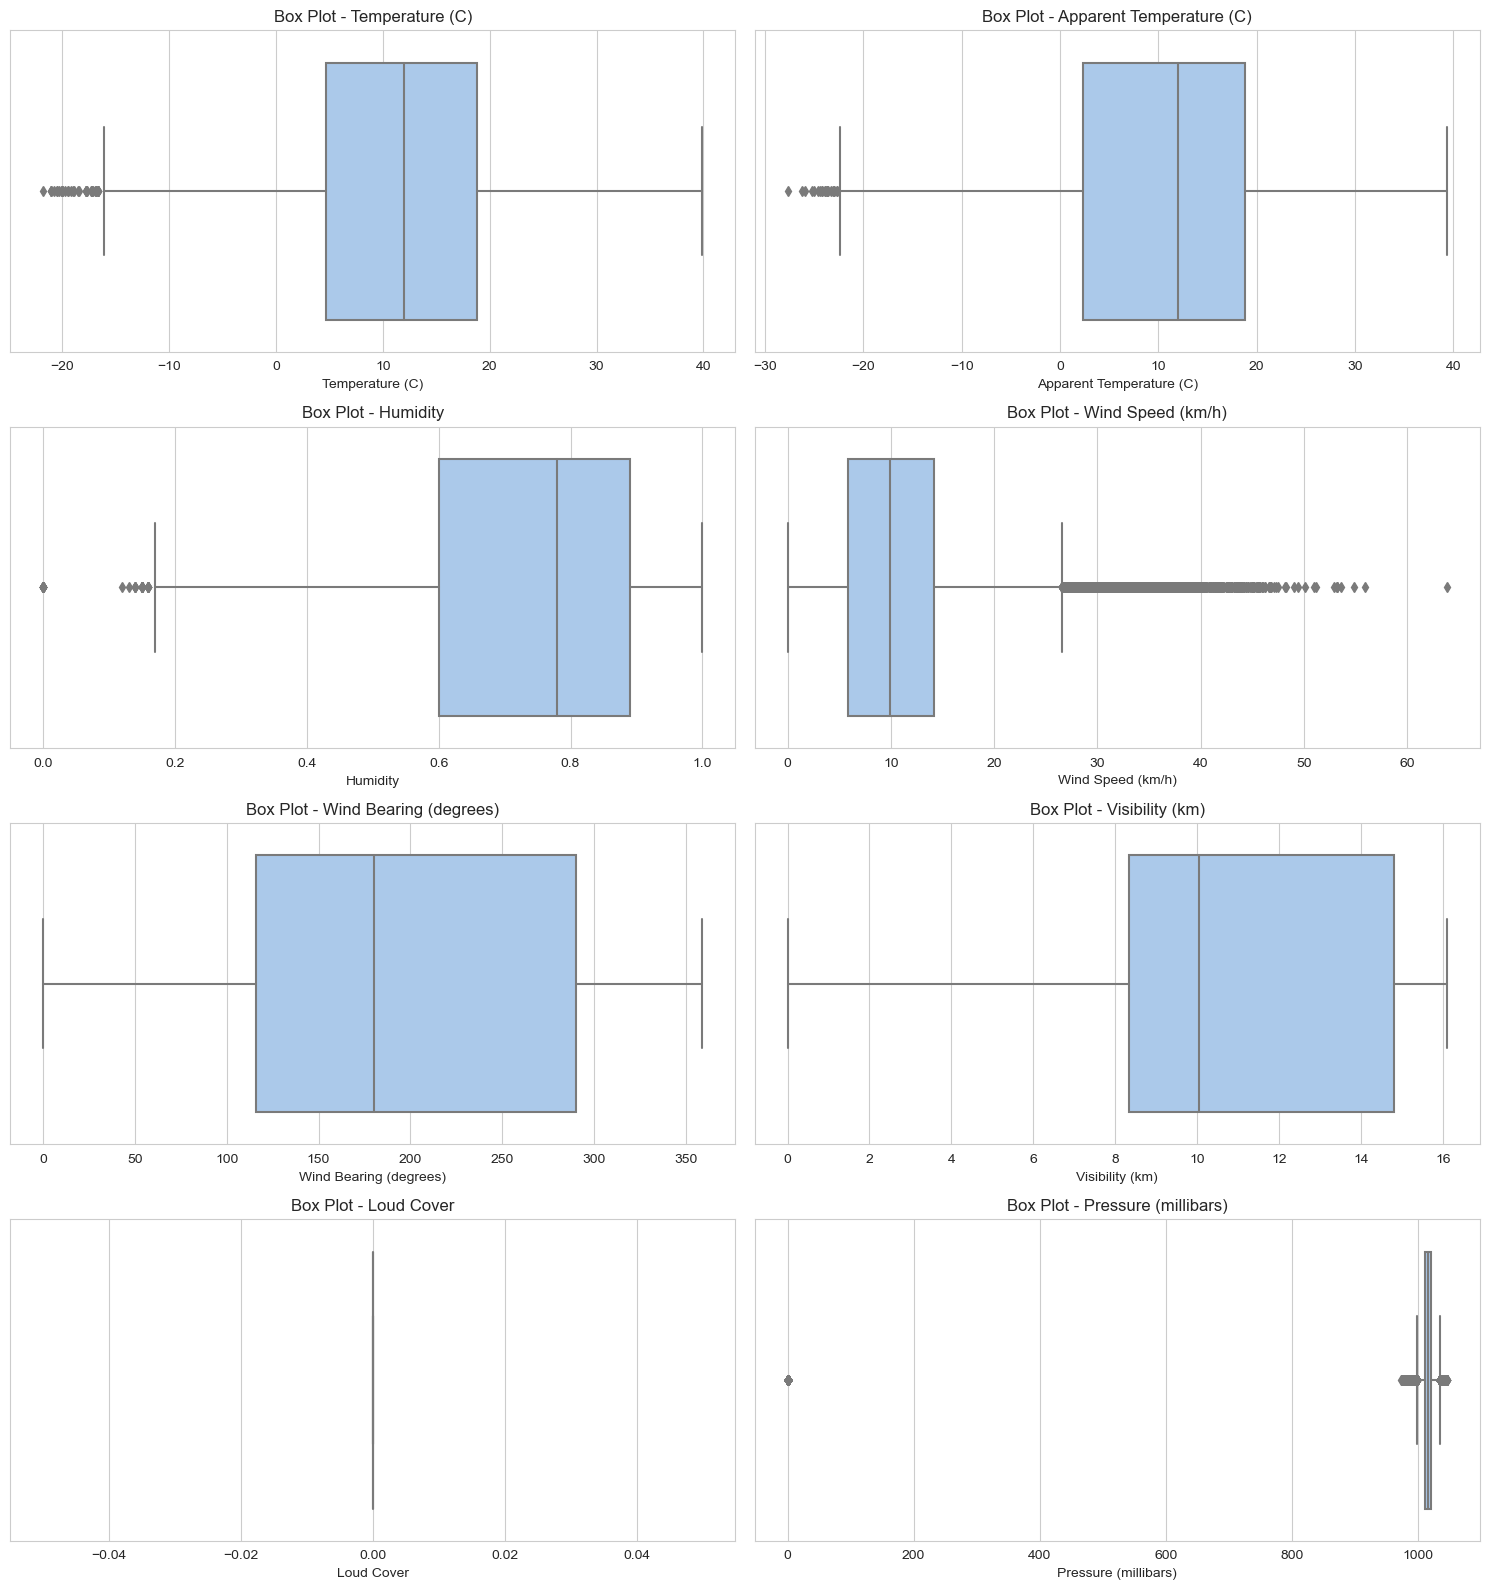

In [17]:
outliers_count = plot_box(numeric_columns)

In [18]:
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')

Number of outliers in Temperature (C): 44
Number of outliers in Apparent Temperature (C): 22
Number of outliers in Humidity: 46
Number of outliers in Wind Speed (km/h): 3028
Number of outliers in Wind Bearing (degrees): 0
Number of outliers in Visibility (km): 0
Number of outliers in Loud Cover: 0
Number of outliers in Pressure (millibars): 4400


So we can see that there are many outliers in columns like pressure, wind speed, both temperature, and humidity so we deal with the by replacing them with corresponding upper and lower bound and also we remove the column loud cover since it only has 0 in it so lets do it

In [19]:
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

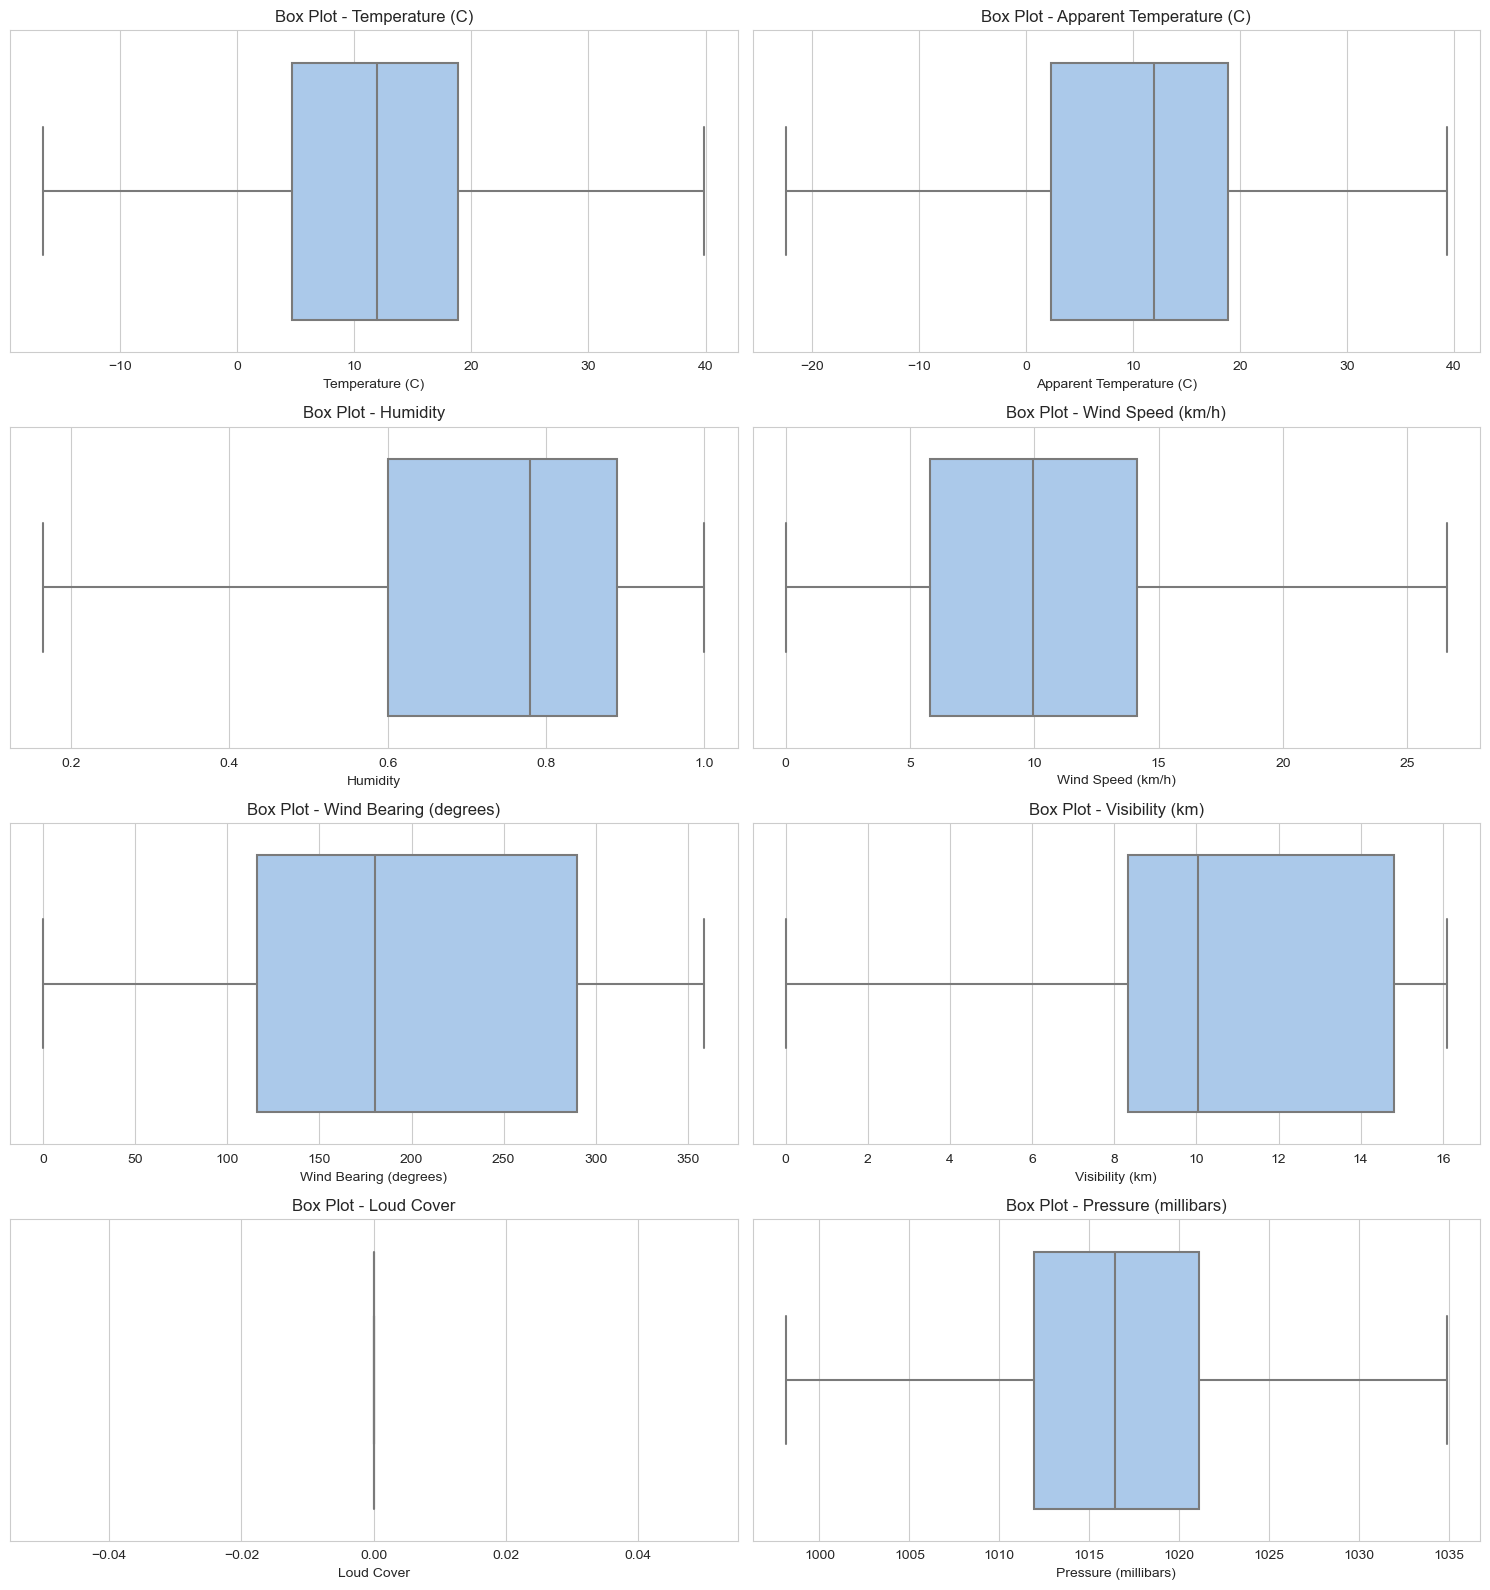

In [20]:
outliers_count = plot_box(numeric_columns)

In [21]:
for column, count in outliers_count.items():
    print(f'Number of outliers after removing outliers in {column}: {count}')

Number of outliers after removing outliers in Temperature (C): 0
Number of outliers after removing outliers in Apparent Temperature (C): 0
Number of outliers after removing outliers in Humidity: 0
Number of outliers after removing outliers in Wind Speed (km/h): 0
Number of outliers after removing outliers in Wind Bearing (degrees): 0
Number of outliers after removing outliers in Visibility (km): 0
Number of outliers after removing outliers in Loud Cover: 0
Number of outliers after removing outliers in Pressure (millibars): 0


You can see that now there are no outliers

### Other Data Issues

In [22]:
df[numeric_columns].corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992648,-0.633371,0.015327,0.029996,0.392765,NaN,-0.295976
Apparent Temperature (C),0.992648,1.000000,-0.603545,-0.050920,0.029019,0.381699,NaN,-0.274234
Humidity,-0.633371,-0.603545,1.000000,-0.230558,0.000591,-0.369600,NaN,0.039712
Wind Speed (km/h),0.015327,-0.050920,-0.230558,1.000000,0.099996,0.105140,NaN,-0.247397
Wind Bearing (degrees),0.029996,0.029019,0.000591,0.099996,1.000000,0.047594,NaN,-0.079058
Visibility (km),0.392765,0.381699,-0.369600,0.105140,0.047594,1.000000,NaN,-0.139723
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.295976,-0.274234,0.039712,-0.247397,-0.079058,-0.139723,NaN,1.000000


we plan to remove Temperature column since its highly correlated with apparent temperature and we only need to predict one and in real time we won't be provied with both the columns

In [23]:
df['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

you can see that there are many categories which might lead to improper prediction so we aim to combine similar categories to reduce the number of categories to 5
- Cloudy
- Clear
- Foggy
- Windy
- Rainy

In [24]:
categories_to_group = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Windy',
    'Breezy and Mostly Cloudy': 'Windy',
    'Breezy and Partly Cloudy': 'Windy',
    'Dry and Partly Cloudy': 'Windy',
    'Windy and Partly Cloudy': 'Windy',
    'Light Rain': 'Rainy',
    'Breezy': 'Windy',
    'Windy and Overcast': 'Windy',
    'Humid and Mostly Cloudy': 'Cloudy',
    'Drizzle': 'Rainy',
    'Breezy and Foggy': 'Foggy',
    'Windy and Mostly Cloudy': 'Windy',
    'Dry': 'Clear',
    'Humid and Partly Cloudy': 'Cloudy',
    'Dry and Mostly Cloudy': 'Cloudy',
    'Rain': 'Rainy',
    'Windy': 'Windy',
    'Humid and Overcast': 'Cloudy',
    'Windy and Foggy': 'Foggy',
    'Windy and Dry': 'Windy',
    'Dangerously Windy and Partly Cloudy': 'Windy',
    'Breezy and Dry': 'Windy',
}

In [25]:
df['Summary'] = df['Summary'].map(categories_to_group).fillna('Other')

In [26]:
df['Summary'].value_counts()

Cloudy    76502
Clear     10924
Foggy      7187
Windy      1728
Rainy       112
Name: Summary, dtype: int64

Now you can see we have only 5 categories

In [27]:
df['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

The daily summary has 214 categories which is very tough to combine manually so we drop the column

In [28]:
#updated numeric and categorical columns after above analysis
numeric_columns = [
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

cat_columns = ['Summary','Precip Type']

### Transforming Variables

In [29]:
#lets transform categorical variables first
cat_columns

['Summary', 'Precip Type']

In [30]:
df['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [31]:
df['Summary'].value_counts()

Cloudy    76502
Clear     10924
Foggy      7187
Windy      1728
Rainy       112
Name: Summary, dtype: int64

In [32]:
cat_df = df[cat_columns].copy()

In [33]:
cat_df_encoded = pd.get_dummies(cat_df, prefix='', prefix_sep='')

cat_df_encoded.head()

,Clear,Cloudy,Foggy,Rainy,Windy,rain,snow
0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0
4,0,1,0,0,0,1,0


In practice if we have n encoded columns for a categorical column those n columns are dependent on each other because knowing n-1 columns will tell you whats the nth colum is so its better to drop one 

In [34]:
cat_df_encoded.drop(labels=['Cloudy','rain'],axis=1, inplace=True)

In [35]:
cat_df_encoded.head()

,Clear,Foggy,Rainy,Windy,snow
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [36]:
#now lets transform numeric variables

In [37]:
df[numeric_columns].head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [38]:
#We should not disturb the output column so lets store it in Y and drop it
Y = df['Apparent Temperature (C)'].copy()

In [39]:
numeric_columns = ['Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)']

In [40]:
num_df = df[numeric_columns].copy()

In [41]:
num_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.89,14.1197,251.0,15.8263,1015.13
1,0.86,14.2646,259.0,15.8263,1015.63
2,0.89,3.9284,204.0,14.9569,1015.94
3,0.83,14.1036,269.0,15.8263,1016.41
4,0.83,11.0446,259.0,15.8263,1016.51


In [42]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'numeric_columns' is the array of column names
scaler = StandardScaler()

# Fit and transform the numeric columns
num_df = scaler.fit_transform(num_df)


In [43]:
num_df = pd.DataFrame(num_df, columns=numeric_columns)

In [44]:
num_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.793815,0.537426,0.591256,1.306976,-0.184921
1,0.640232,0.559914,0.665756,1.306976,-0.120197
2,0.793815,-1.044235,0.153570,1.099586,-0.080067
3,0.486650,0.534927,0.758881,1.306976,-0.019226
4,0.486650,0.060179,0.665756,1.306976,-0.006281


In [45]:
#combining categorical and numeric df to obtain train_df
train_df = pd.concat([num_df, cat_df_encoded], axis=1)

In [46]:
train_df.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Clear,Foggy,Rainy,Windy,snow
0,0.793815,0.537426,0.591256,1.306976,-0.184921,0,0,0,0,0
1,0.640232,0.559914,0.665756,1.306976,-0.120197,0,0,0,0,0
2,0.793815,-1.044235,0.153570,1.099586,-0.080067,0,0,0,0,0
3,0.486650,0.534927,0.758881,1.306976,-0.019226,0,0,0,0,0
4,0.486650,0.060179,0.665756,1.306976,-0.006281,0,0,0,0,0


In [47]:
train_df.shape

(96453, 10)

### EDA

In [48]:
df['Summary'] = cat_df['Summary']
numeric_columns_eda = [
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']

In [49]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.933644,10.855413,0.734940,10.656843,187.509232,10.347325,0.0,1016.558519
std,9.548503,10.695605,0.195336,6.443449,107.383428,4.192123,0.0,7.725042
min,-16.536111,-22.480556,0.165000,0.000000,0.000000,0.000000,0.0,998.115000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,26.597200,359.000000,16.100000,0.0,1034.875000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [51]:
correlation_matrix = df[numeric_columns_eda].corr()

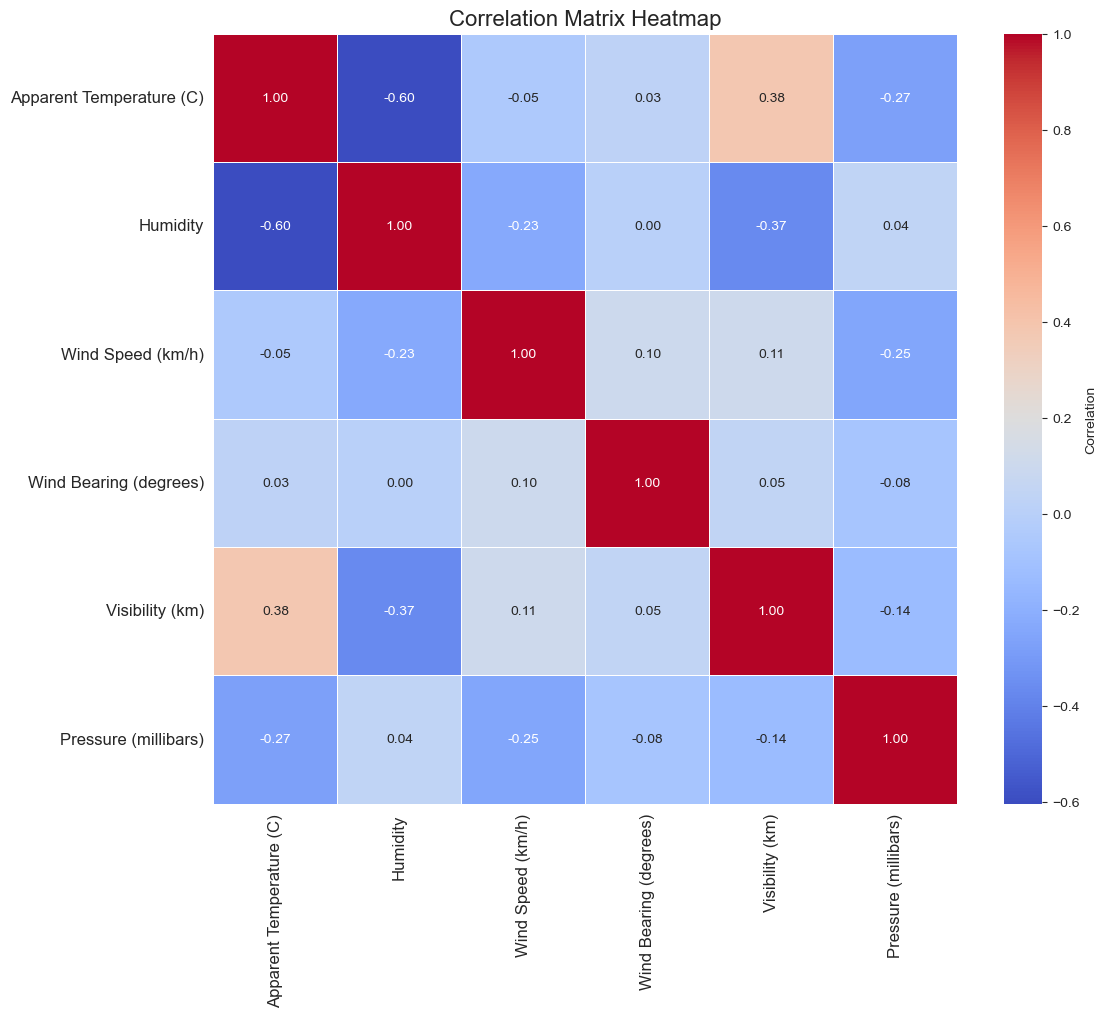

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

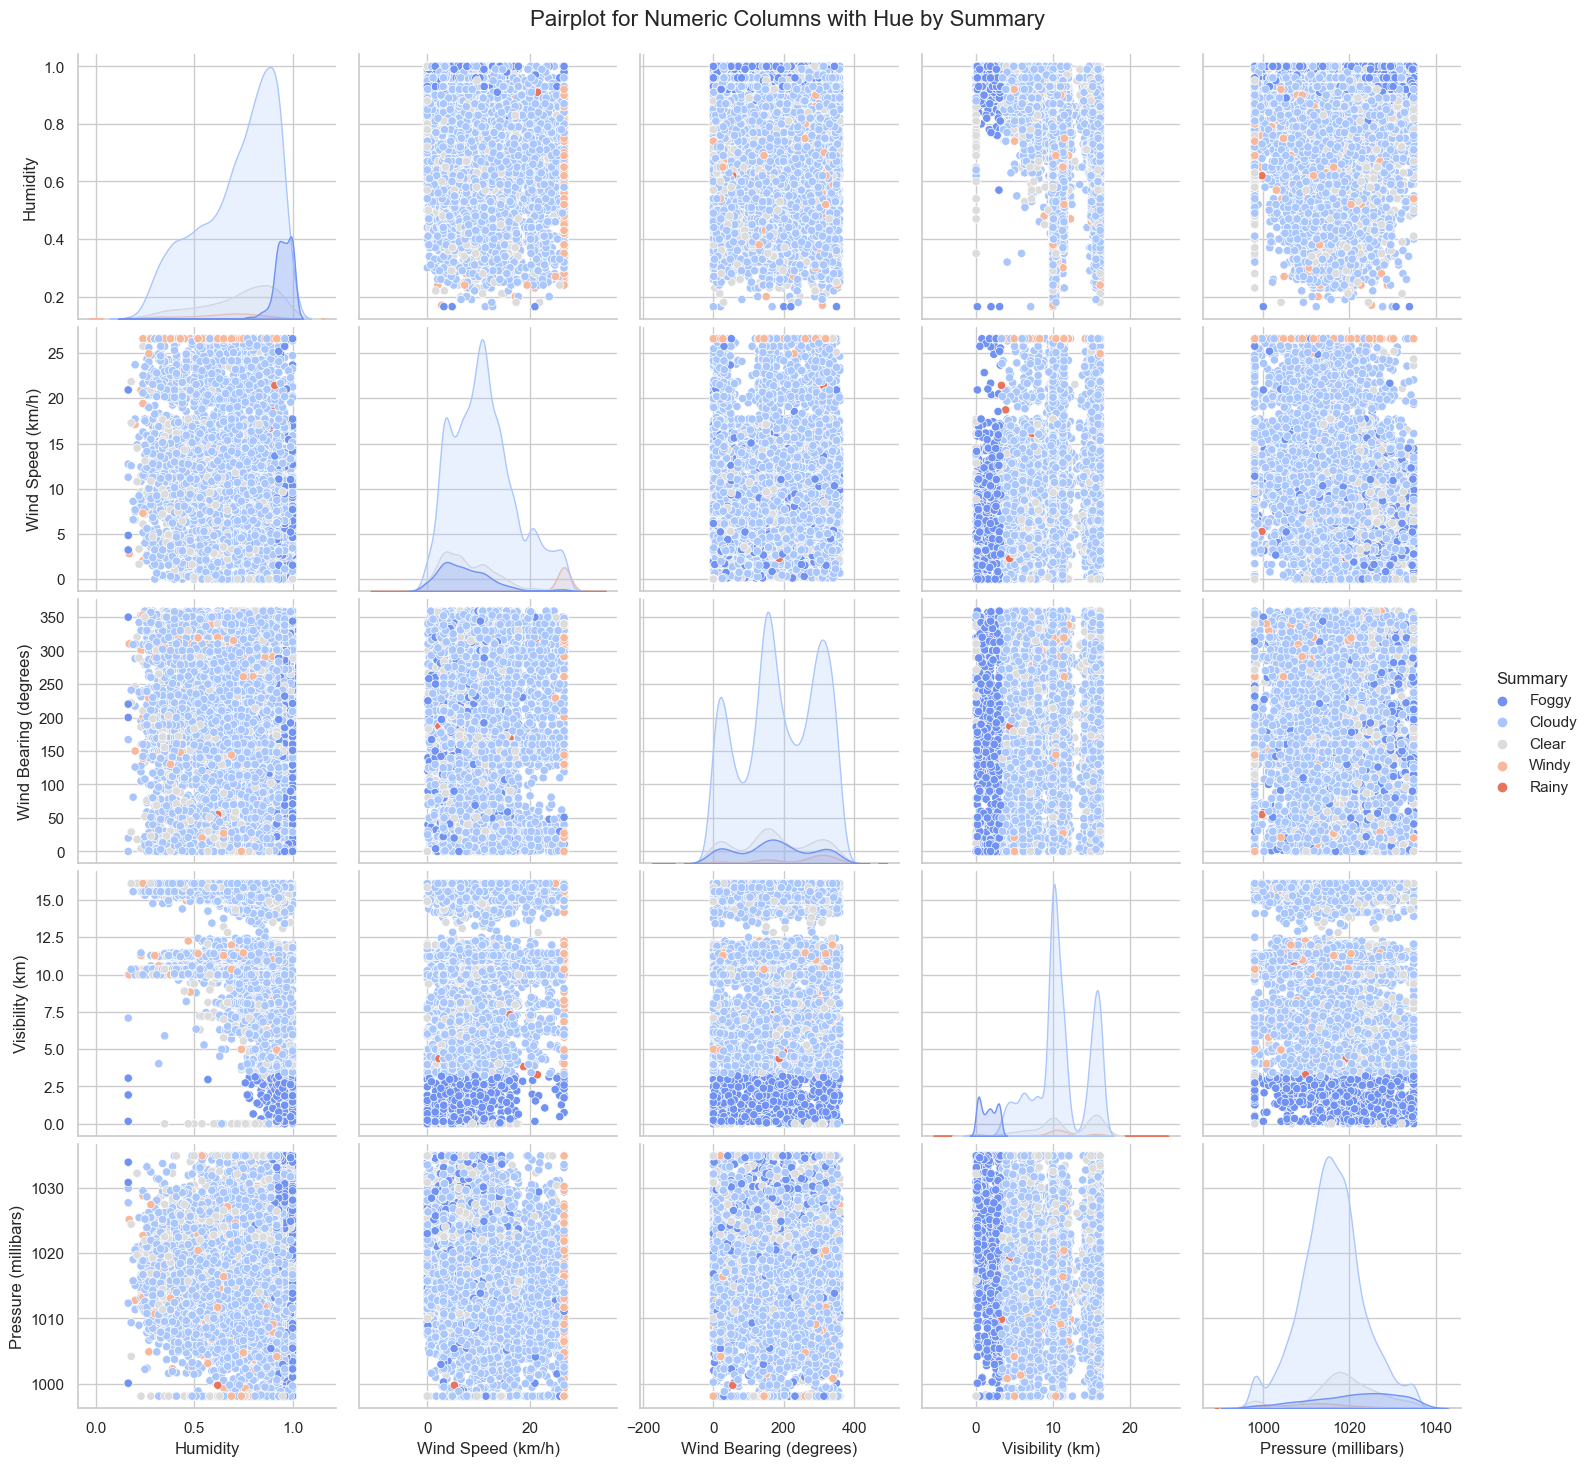

In [55]:
sns.set(style="whitegrid")
sampled_df = df.sample(10000)
palette = sns.color_palette("coolwarm", n_colors=len(df['Summary'].unique()))
sns.pairplot(sampled_df, hue='Summary', vars=numeric_columns, palette=palette, markers='o', diag_kind='kde', height=3)
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot for Numeric Columns with Hue by Summary', fontsize=16)
plt.show()

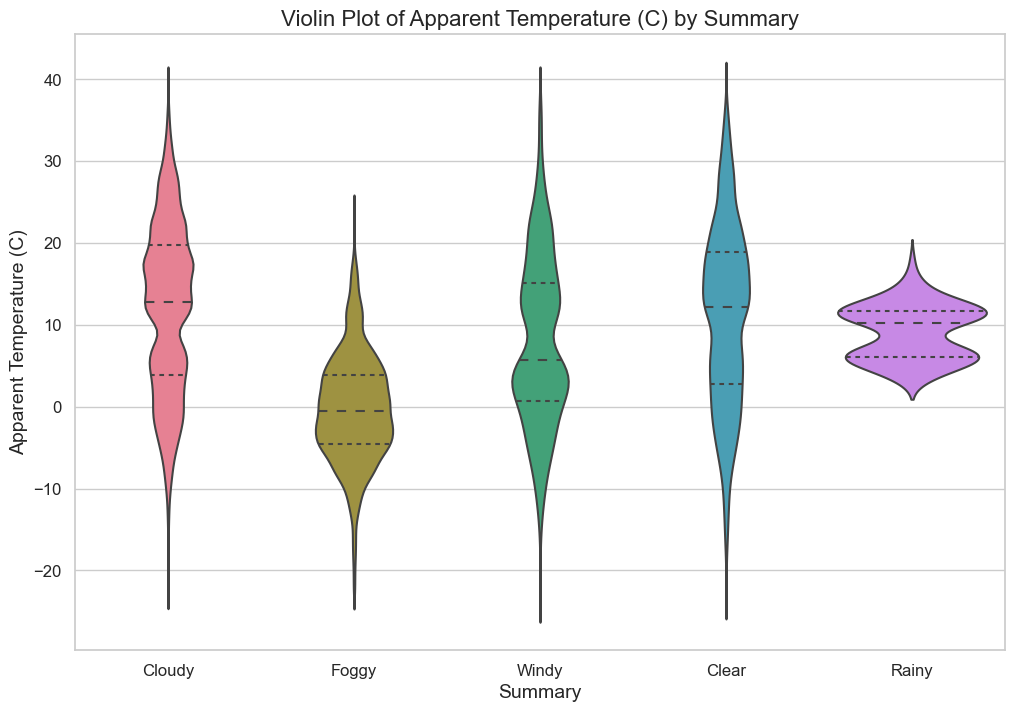

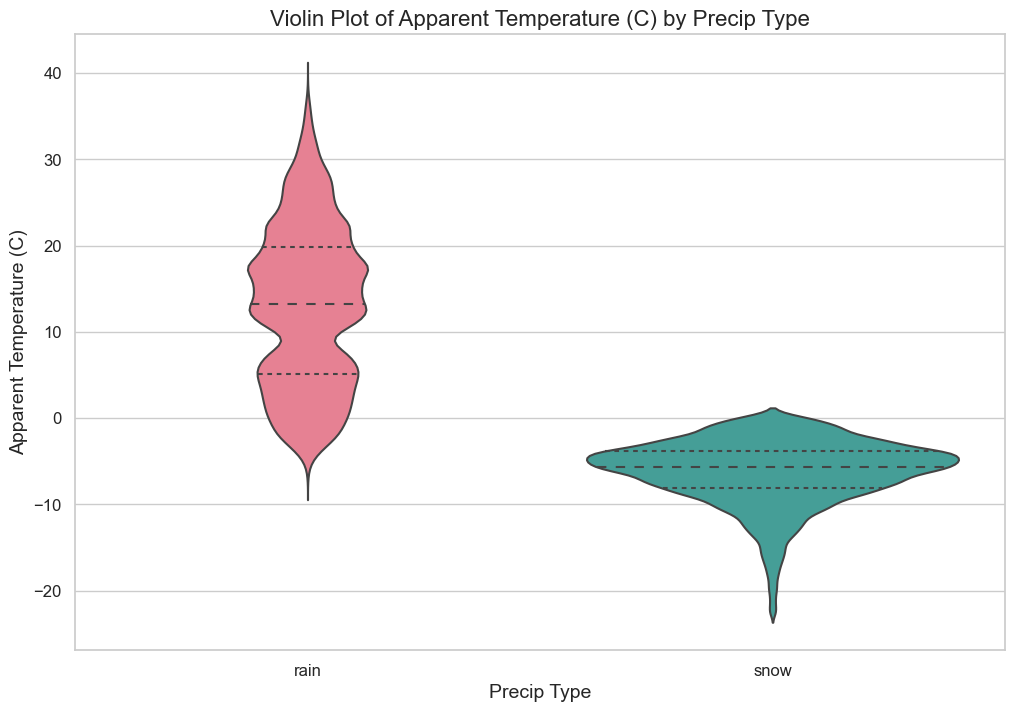

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for column in cat_columns:
    plt.figure(figsize=(12, 8))
    palette = sns.color_palette("husl", n_colors=len(df[column].unique()))
    sns.violinplot(x=column, y='Apparent Temperature (C)', data=df, palette=palette, inner='quartile')
    plt.title(f'Violin Plot of Apparent Temperature (C) by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Apparent Temperature (C)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

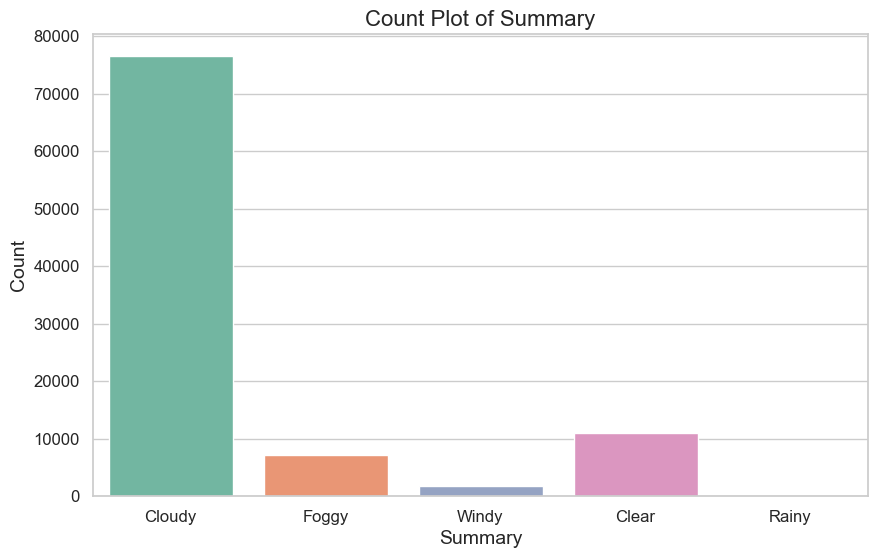

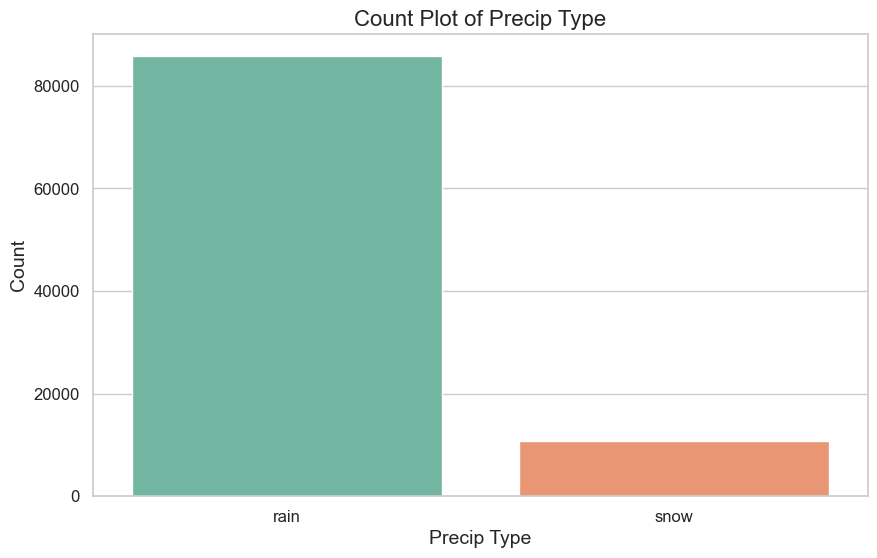

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for column in cat_columns:
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("Set2", n_colors=len(df[column].unique()))
    sns.countplot(x=column, data=df, palette=palette)
    plt.title(f'Count Plot of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

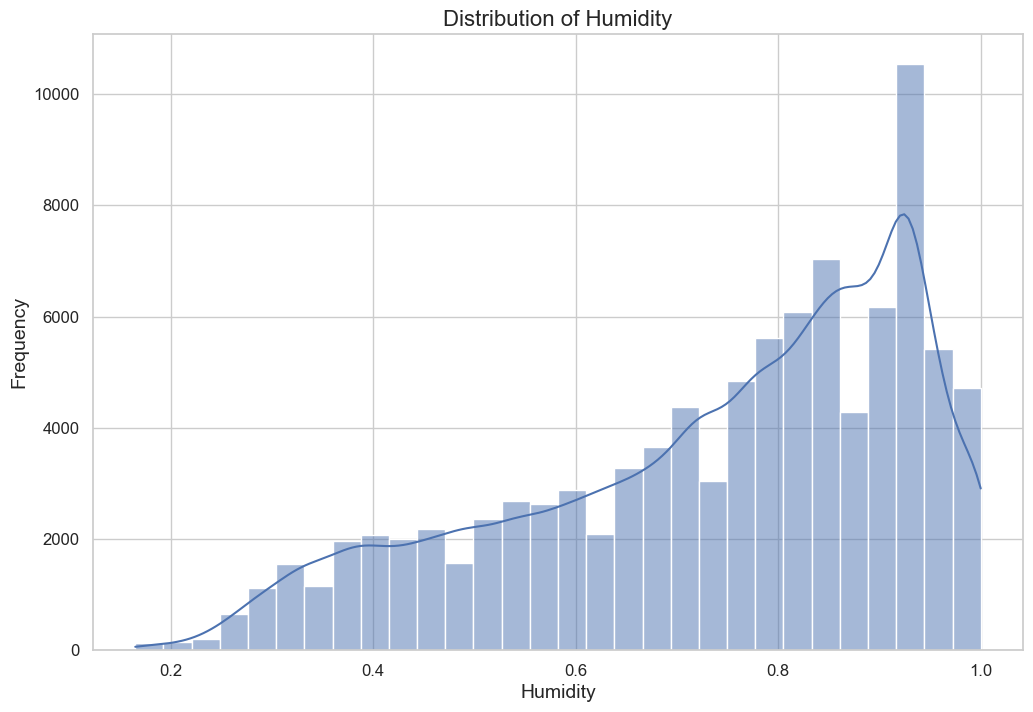

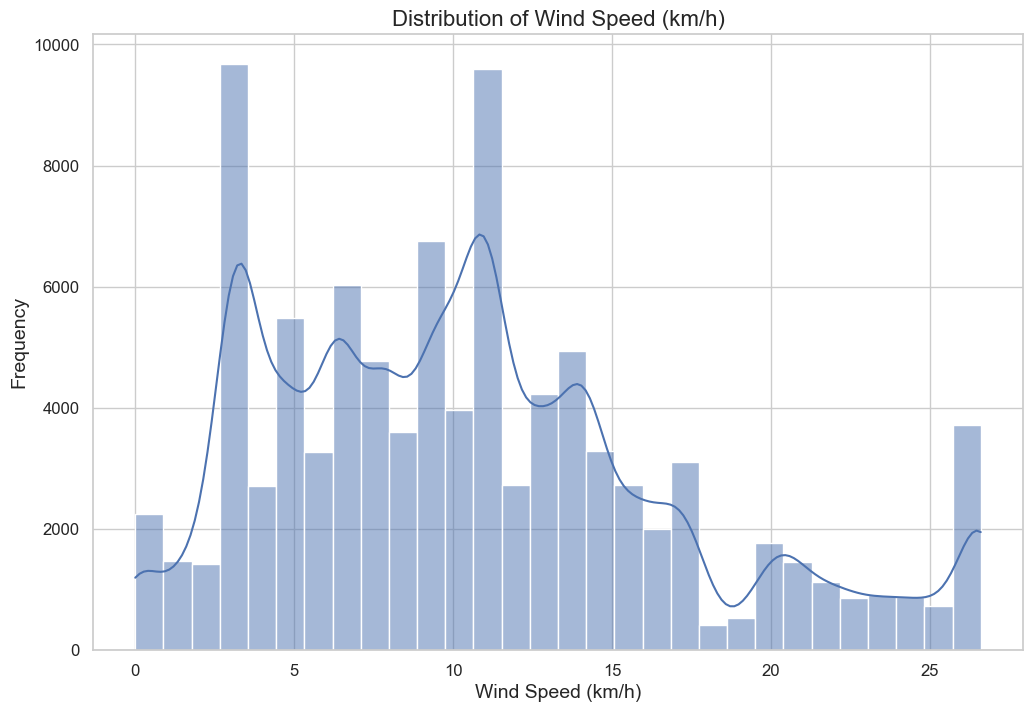

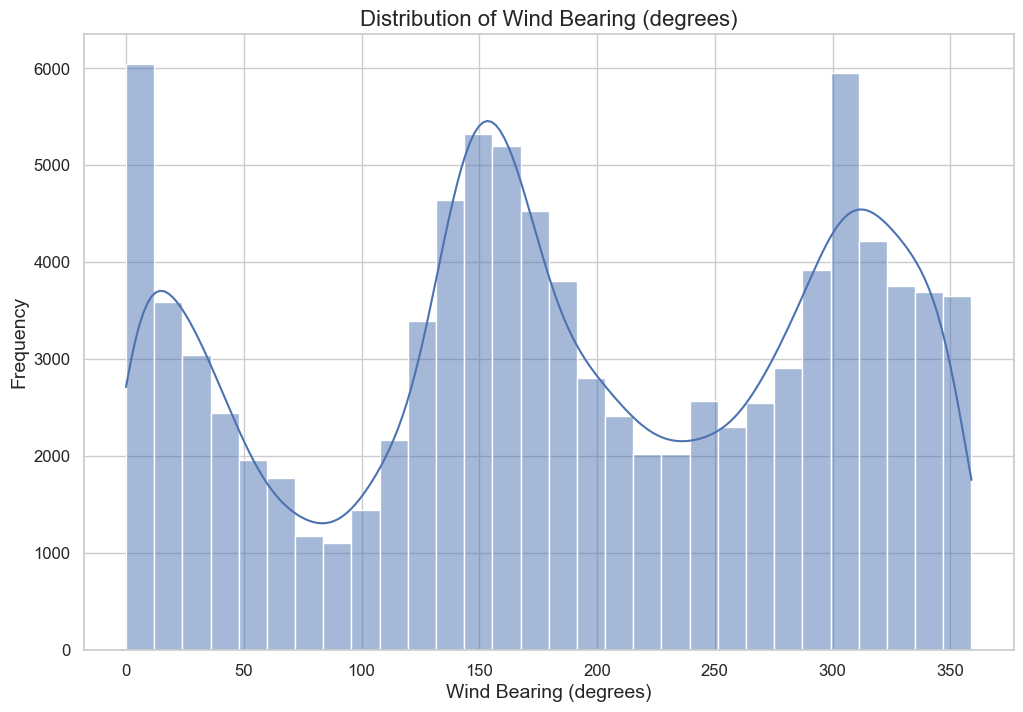

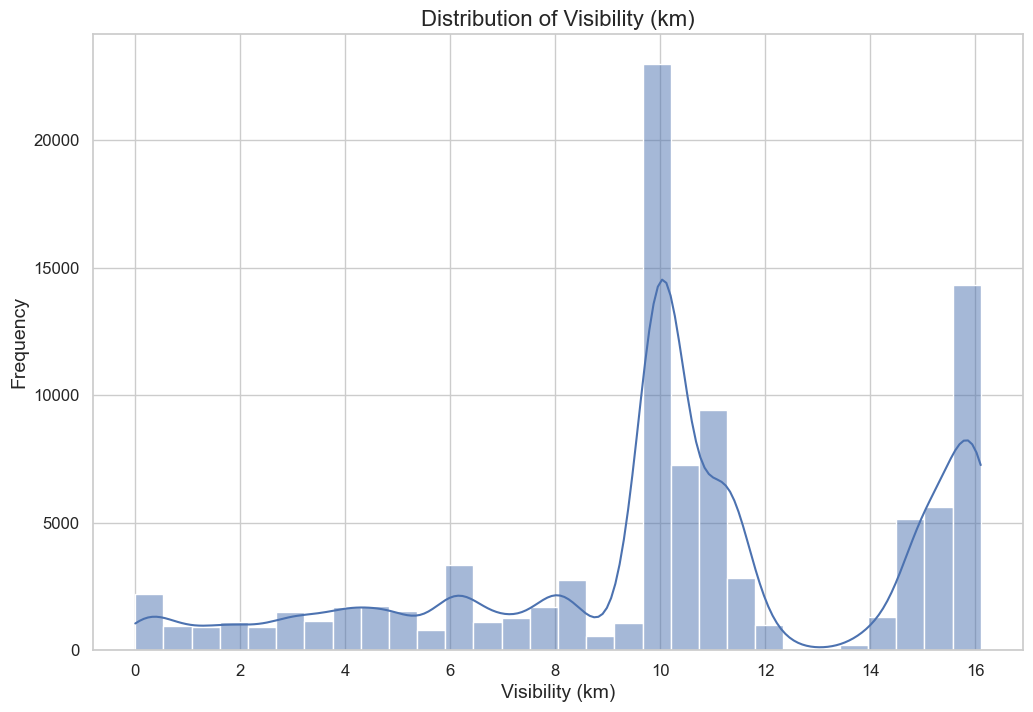

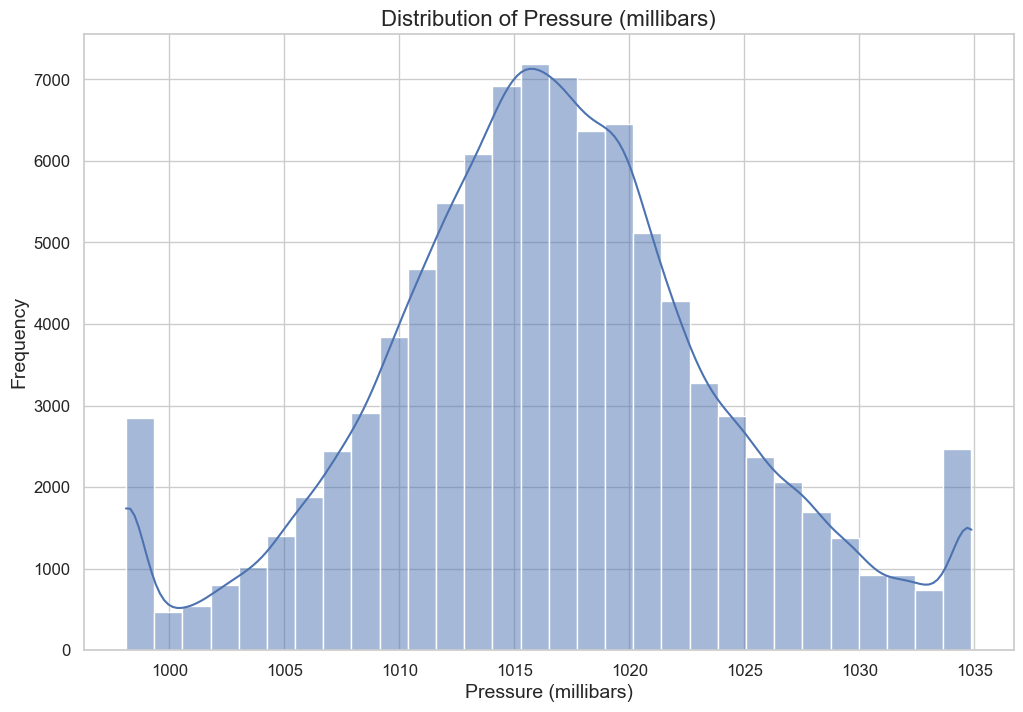

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for num_column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(df[num_column], kde=True, bins=30)
    plt.title(f'Distribution of {num_column}', fontsize=16)
    plt.xlabel(num_column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# 4. Methodology

## Statistical Methods
### Chi-squared Test for Categorical Variables:
The selection of the Chi-squared test for examining the relationship between the categorical variables 'Summary' and 'Precip Type' is driven by the nature of the variables. Since both variables are categorical, the Chi-squared test is well-suited to assess whether there is a statistically significant association between them. This test operates effectively on contingency tables, making it applicable to scenarios where the goal is to compare the distribution of categorical variables across different categories. In this context, the Chi-squared test helps determine whether the observed frequency distribution deviates significantly from what would be expected under the assumption of independence between the variables. By formulating and testing hypotheses, this statistical method provides insights into the presence or absence of a meaningful association between the two categorical variables.

### Kolmogorov-Smirnov (KS) Test for Numeric Variables:
The Kolmogorov-Smirnov (KS) test is chosen for examining numeric variables, such as temperature measurements, due to its ability to assess distributional differences between two samples. One key rationale for employing the KS test lies in its non-parametric nature, which means it does not assume a specific distribution for the data. This characteristic is particularly valuable when dealing with numeric variables for which the underlying distribution is unknown. The KS test is sensitive to variations in shape, location, and scale between distributions, making it suitable for detecting differences in the cumulative distribution functions of the numeric variables under consideration. Given its pairwise nature, the KS test allows for the comparison of distributions between each combination of numeric columns. Additionally, the assumption of independence between observations aligns well with scenarios where the focus is on assessing the independence or similarity of different numeric variables. In summary, the KS test provides a versatile and informative approach to exploring the distributional characteristics and potential dependencies among numeric variables in the dataset.

### Modelling Methods
#### 1. Linear Regression:
**Reason**: Linear regression is a fundamental and widely used technique that assumes a linear relationship between the independent and dependent variables. It's suitable when the relationship between variables can be adequately approximated by a straight line. Linear regression is computationally efficient, interpretable, and serves as a baseline model for comparison.

**Regression Approach**: Linear regression assumes a linear relationship between the independent and dependent variables.

**Assumptions**:
 - Linearity: Assumes a linear relationship.
 - Independence: Residuals are independent.
 - Homoscedasticity: Residuals have constant variance.
 - Normality of Residuals: Residuals are normally distributed.

**Applicability**:
Suitable when the relationship between variables is approximately linear and assumptions are met. Effective as a baseline model.

#### 2. Ridge Regression (L2 Regularization):
**Reason**: Ridge regression is chosen when dealing with multicollinearity among predictor variables. It adds a regularization term to the linear regression objective function, preventing overfitting and stabilizing the model. Ridge regression is effective when there are high correlations between predictors.

**Regression Approach**:
Ridge regression extends linear regression by adding a regularization term to the objective function to address multicollinearity.

**Assumptions**:
 - Linearity: Assumes a linear relationship.
 - Independence: Residuals are independent.
 - Homoscedasticity: Residuals have constant variance.
 - Normality of Residuals: Residuals are normally distributed.

**Applicability**:
Effective when multicollinearity is present, providing a solution for unstable estimates in the presence of highly correlated predictors.

#### 3. Lasso Regression (L1 Regularization):
**Reason**: Lasso regression is beneficial when feature selection is essential. It introduces sparsity by adding an L1 regularization term to the linear regression objective function, encouraging some coefficients to be exactly zero. This is valuable when dealing with datasets with a large number of predictors.

**Regression Approach**:
Lasso regression, like Ridge, extends linear regression with regularization but uses L1 regularization, promoting sparsity in coefficients.

**Assumptions**:
 - Linearity: Assumes a linear relationship.
 - Independence: Residuals are independent.
 - Homoscedasticity: Residuals have constant variance.
 - Normality of Residuals: Residuals are normally distributed.

**Applicability**:
Useful when feature selection is crucial, as it tends to set some coefficients exactly to zero.

#### 4. Elastic Net Regression:
**Reason**: Elastic Net combines L1 and L2 regularization, offering a compromise between Ridge and Lasso. It is useful when there are many features, some of which are correlated, and variable selection is desired. Elastic Net handles both multicollinearity and feature selection challenges.

**Regression Approach**:
Elastic Net combines Ridge and Lasso by adding both L1 and L2 regularization terms to the objective function.

**Assumptions**:
 - Linearity: Assumes a linear relationship.
 - Independence: Residuals are independent.
 - Homoscedasticity: Residuals have constant variance.
 - Normality of Residuals: Residuals are normally distributed.

**Applicability**:
Effective when there are many features, some of which are correlated, offering a balanced solution between Ridge and Lasso.

#### 5. Polynomial Regression:
**Reason**: Polynomial regression is employed when the relationship between the independent and dependent variables is nonlinear. It extends linear regression by including polynomial terms, capturing more complex patterns in the data. Polynomial regression is suitable for situations where a straight line is insufficient to represent the underlying relationship

**Regression Approach**:
Polynomial regression extends linear regression by including polynomial terms to capture non-linear relationships.

**Assumptions**:
 - Linearity: Assumes a nonlinear relationship captured by polynomial terms.
 - Independence: Residuals are independent.
 - Homoscedasticity: Residuals have constant variance.
 - Normality of Residuals: Residuals are normally distributed.

**Applicability**:
Suitable when the relationship between variables is nonlinear, providing flexibility to capture more complex patterns in the data.


## Statistical Tests

In [60]:
import pandas as pd
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(df['Summary'], df['Precip Type'])

chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-squared test of independence:")
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("\nConclusion: Reject the null hypothesis.")
    print("Interpretation: There is a significant association between 'Summary' and 'Precip Type'.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("Interpretation: There is no significant association between 'Summary' and 'Precip Type'.")


Chi-squared test of independence:
Chi-squared value: 7678.249037735084
P-value: 0.0

Conclusion: Reject the null hypothesis.
Interpretation: There is a significant association between 'Summary' and 'Precip Type'.


In [61]:
from scipy.stats import ks_2samp

def ks_test(idx1, idx2):
    column1 = df[numeric_columns[idx1]]
    column2 = df[numeric_columns[idx2]]
    
    ks_statistic, p_value = ks_2samp(column1, column2)
    
    if p_value < 0.05:
        pass
    elif idx1!=idx2 and p_value > 0.05:
        print("\nFail to reject the null hypothesis: The two samples  come from the same distribution.")
        print(idx1, idx2)

In [62]:
for idx1 in range(len(numeric_columns)):
    for idx2 in range(len(numeric_columns)):
        ks_test(idx1, idx2)
print('Test Completed')

Test Completed


## Modelling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(train_df, Y, test_size=0.2, random_state=42)

### Linear Regression

In [64]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, linear_predictions)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
print(f"Linear Regression R-squared: {linear_r2:.4f}, MSE: {linear_mse:.4f}, RMSE: {linear_rmse:.4f}")

Linear Regression R-squared: 0.6397, MSE: 41.6781, RMSE: 6.4559


### Ridge Regression

In [65]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print(f"Ridge Regression R-squared: {ridge_r2:.4f}, MSE: {ridge_mse:.4f}, RMSE: {ridge_rmse:.4f}")

Ridge Regression R-squared: 0.6397, MSE: 41.6782, RMSE: 6.4559


### Lasso Regression

In [66]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Lasso Regression R-squared: {lasso_r2:.4f}, MSE: {lasso_mse:.4f}, RMSE: {lasso_rmse:.4f}")

Lasso Regression R-squared: 0.5270, MSE: 54.7219, RMSE: 7.3974


### Elastic Net Regression

In [67]:
# Elastic Net Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  
elasticnet_model.fit(X_train, y_train)
elasticnet_predictions = elasticnet_model.predict(X_test)
elasticnet_r2 = r2_score(y_test, elasticnet_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)
elasticnet_rmse = np.sqrt(elasticnet_mse)
print(f"Elastic Net Regression R-squared: {elasticnet_r2:.4f}, MSE: {elasticnet_mse:.4f}, RMSE: {elasticnet_rmse:.4f}")

Elastic Net Regression R-squared: 0.4496, MSE: 63.6733, RMSE: 7.9796


### Polynomial Regression

In [68]:
# Polynomial Regression
degree = 2 
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
poly_r2 = r2_score(y_test, poly_predictions)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
print(f"Polynomial Regression degree 2 R-squared: {poly_r2:.4f}, MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}")

Polynomial Regression degree 2 R-squared: 0.6929, MSE: 35.5279, RMSE: 5.9605


## Model Comparision

| Model                            |   R-squared |     MSE |   RMSE |
|:---------------------------------|------------:|--------:|-------:|
| Linear Regression                |      0.6397 | 41.6781 | 6.4559 |
| Ridge Regression                 |      0.6397 | 41.6782 | 6.4559 |
| Lasso Regression                 |      0.527  | 54.7219 | 7.3974 |
| Elastic Net Regression           |      0.4496 | 63.6733 | 7.9796 |
| Polynomial Regression (degree 2) |      0.6929 | 35.5279 | 5.9605 |



The results of the regression models provide valuable insights into the predictive performance and characteristics of the dataset. The linear regression and ridge regression models exhibit similar performance, suggesting that the regularization introduced by ridge may not significantly impact the model's fit in this context. However, the Lasso regression model, with its pronounced feature selection, shows a decrease in predictive accuracy, emphasizing the importance of carefully balancing regularization strength with model complexity. Elastic Net, combining L1 and L2 regularization, performs less well than linear regression, indicating that the benefits of both regularization types may not be crucial for this specific dataset. On the other hand, polynomial regression with quadratic terms demonstrates superior predictive performance, underscoring the presence of non-linear relationships in the data. These results emphasize the importance of considering the specific characteristics of the dataset and the trade-offs introduced by different regularization techniques when selecting an appropriate regression model for prediction.

## Model Improvement

In [69]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('ridge', Ridge())
])

param_grid = {
    'pca__n_components': [None, 0.95, 0.99],
    'ridge__alpha': [0.001,0.01,0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {best_params}")
print(f"Ridge Regression MSE: {mse:.4f}")
print(f"Ridge Regression RMSE: {rmse:.4f}")

Best Hyperparameters: {'pca__n_components': None, 'ridge__alpha': 1.0}
Ridge Regression MSE: 41.6781
Ridge Regression RMSE: 6.4559


In [70]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lasso', Lasso())
])

param_grid = {
    'pca__n_components': [None, 0.95, 0.99],
    'lasso__alpha': [0.001,0.01,0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {best_params}")
print(f"Lasso Regression MSE: {mse:.4f}")
print(f"Lasso Regression RMSE: {rmse:.4f}")

Best Hyperparameters: {'lasso__alpha': 0.001, 'pca__n_components': None}
Lasso Regression MSE: 41.6779
Lasso Regression RMSE: 6.4558


In [71]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('elastic', ElasticNet())
])

param_grid = {
    'pca__n_components': [None, 0.95, 0.99],
    'elastic__alpha': [0.001, 0.01, 0.1, 1.0],
    'elastic__l1_ratio':[0.001, 0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error',error_score='raise')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters: {best_params}")
print(f"Elastic Regression MSE: {mse:.4f}")
print(f"Elastic Regression RMSE: {rmse:.4f}")

Best Hyperparameters: {'elastic__alpha': 0.001, 'elastic__l1_ratio': 1.0, 'pca__n_components': None}
Elastic Regression MSE: 41.6779
Elastic Regression RMSE: 6.4558


In [72]:
poly_pca_pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), PCA(), LinearRegression())

# Parameter grid for Polynomial Regression with PCA
param_grid = {
    'polynomialfeatures__degree': [2, 3],
    'pca__n_components': [None, 0.95, 0.99],
}

grid_search = GridSearchCV(poly_pca_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)

params = grid_search.best_params_
model = grid_search.best_estimator_
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Hyperparameters (Poly Regression with PCA): {params}")
print(f"Poly Regression with PCA MSE: {mse:.4f}")
print(f"Poly Regression with PCA RMSE: {rmse:.4f}")

Best Hyperparameters (Poly Regression with PCA): {'pca__n_components': None, 'polynomialfeatures__degree': 3}
Poly Regression with PCA MSE: 33.2960
Poly Regression with PCA RMSE: 5.7703


# 5. Results and Interpretation

| Model                    | Best Hyperparameters                                                           |     MSE |   RMSE |
|:-------------------------|:-------------------------------------------------------------------------------|--------:|-------:|
| Ridge Regression         | {'pca__n_components': None, 'ridge__alpha': 1.0}                               | 41.6781 | 6.4559 |
| Lasso Regression         | {'lasso__alpha': 0.001, 'pca__n_components': None}                             | 41.6779 | 6.4558 |
| Elastic Regression       | {'elastic__alpha': 0.001, 'elastic__l1_ratio': 1.0, 'pca__n_components': None} | 41.6779 | 6.4558 |
| Poly Regression with PCA | {'pca__n_components': None, 'polynomialfeatures__degree': 3}                   | 33.296  | 5.7703 |

The results demonstrate interesting insights into the impact of incorporating PCA and polynomial features on various regression models. Notably, Ridge, Lasso, and Elastic Net regressions doesn't exhibit improvements in predictive performance after the application of PCA

The Polynomial Regression model, particularly with a degree of 3, showcases a substantial improvement in accuracy, with a significant decrease in both MSE and RMSE. 

Overall, these findings underscore the importance of feature engineering techniques, such as PCA and polynomial regression, in refining model accuracy. It also highlights the model-specific responses to these techniques, suggesting that tailoring the approach to the characteristics of the dataset can lead to more effective predictions. 

                  Feature  Coefficient
0                Humidity    -5.861968
1       Wind Speed (km/h)    -2.724760
2  Wind Bearing (degrees)     0.222446
3         Visibility (km)     0.734562
4    Pressure (millibars)    -2.150340
5                   Clear    -0.477628
6                   Foggy     0.653706
7                   Rainy     0.899417
8                   Windy    -2.043009
9                    snow   -12.951744
Intercept: 12.329963332088917


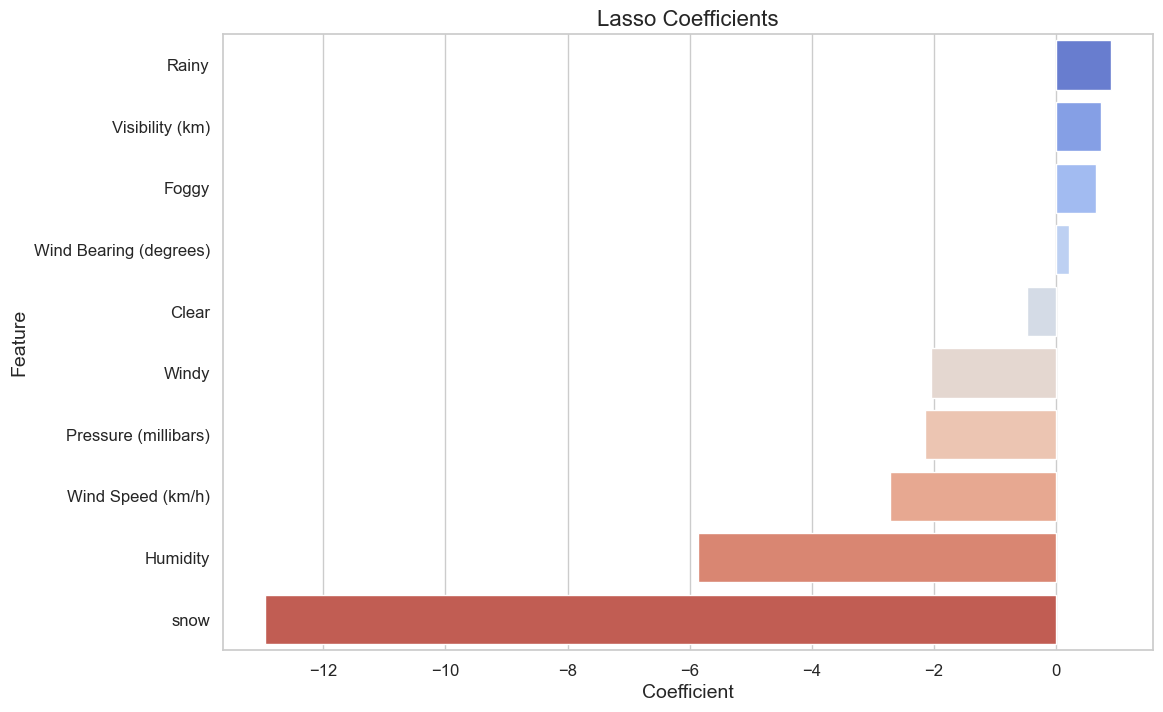

In [73]:
best_lasso_model = Lasso(alpha=0.001)  
best_lasso_model.fit(X_train, y_train)
feature_names = X_train.columns

coefficients = best_lasso_model.coef_
intercept = best_lasso_model.intercept_

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coefficients_df)
print(f'Intercept: {intercept}')

sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", n_colors=len(sorted_coefficients))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients, palette=colors)
plt.title('Lasso Coefficients', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

                  Feature  Coefficient
0                Humidity    -5.864093
1       Wind Speed (km/h)    -2.724178
2  Wind Bearing (degrees)     0.223750
3         Visibility (km)     0.740217
4    Pressure (millibars)    -2.151065
5                   Clear    -0.486016
6                   Foggy     0.685787
7                   Rainy     1.763249
8                   Windy    -2.099737
9                    snow   -12.958810
Intercept: 12.329341246613547


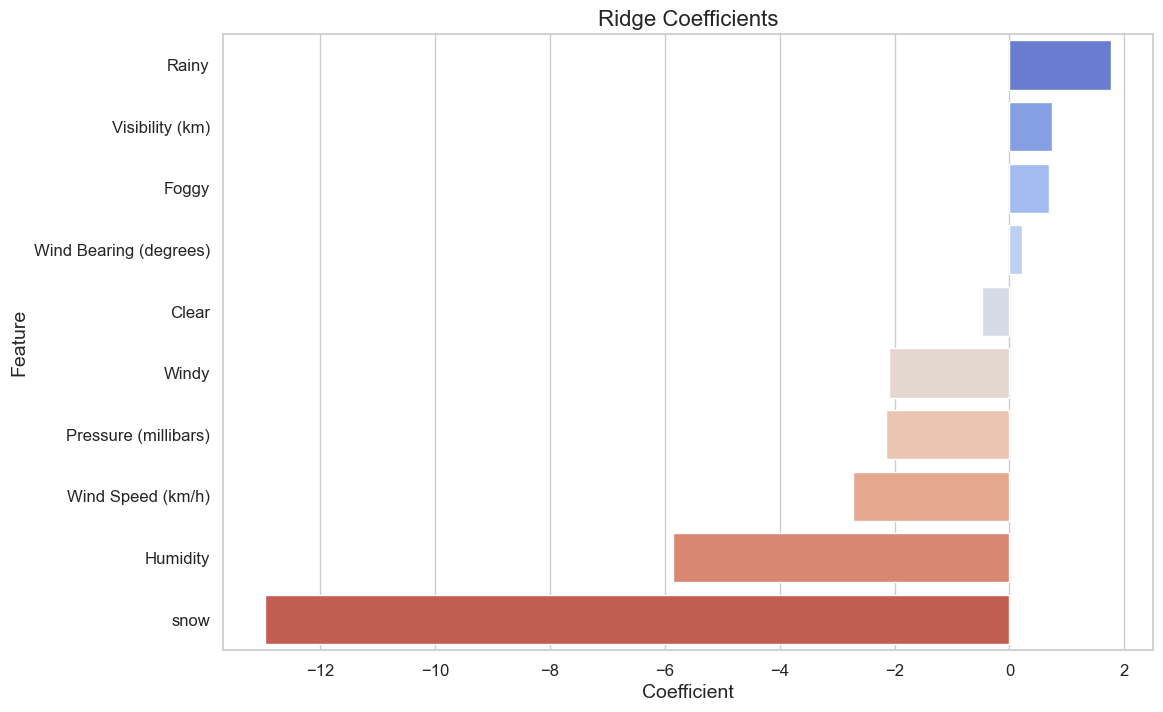

In [74]:
best_ridge_model = Ridge(alpha=1.0)  
best_ridge_model.fit(X_train, y_train)
feature_names = X_train.columns

coefficients = best_ridge_model.coef_
intercept = best_ridge_model.intercept_

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)
print(f'Intercept: {intercept}')

sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", n_colors=len(sorted_coefficients))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients, palette=colors)
plt.title('Ridge Coefficients', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

                  Feature  Coefficient
0                Humidity    -5.864129
1       Wind Speed (km/h)    -2.724147
2  Wind Bearing (degrees)     0.223759
3         Visibility (km)     0.740156
4    Pressure (millibars)    -2.150959
5                   Clear    -0.485996
6                   Foggy     0.686429
7                   Rainy     1.783118
8                   Windy    -2.101288
9                    snow   -12.960778
Intercept: 12.329514736749612


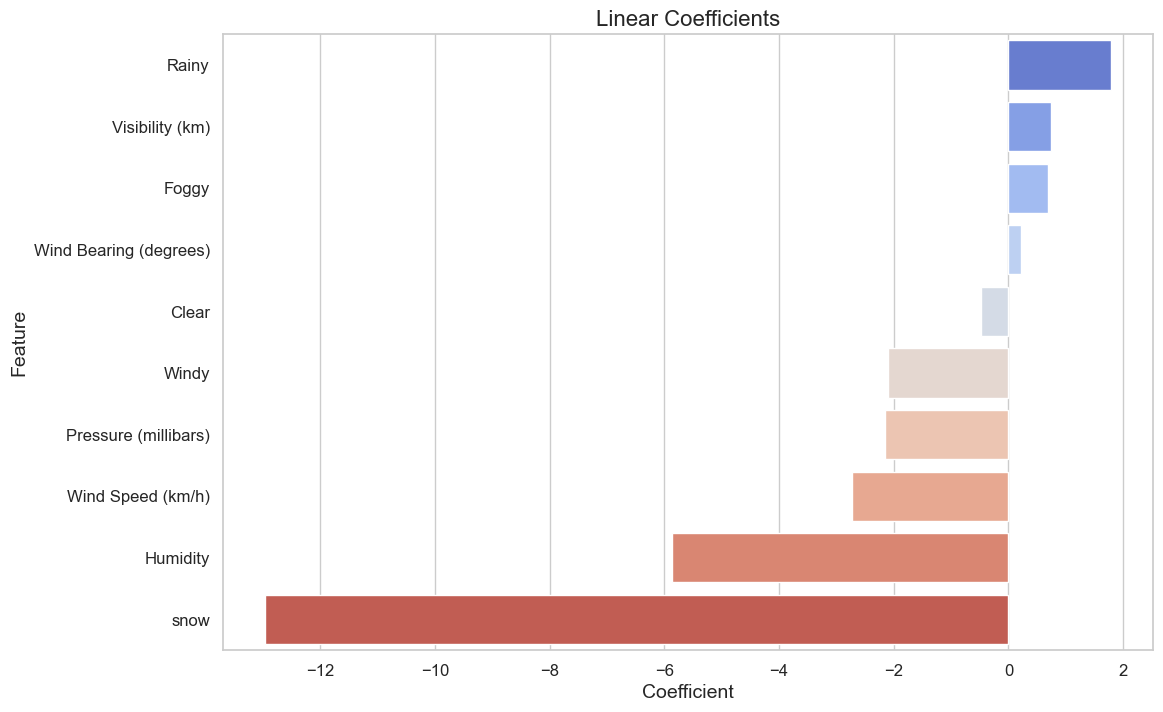

In [75]:
best_linear_model = LinearRegression()  
best_linear_model.fit(X_train, y_train)
feature_names = X_train.columns

coefficients = best_linear_model.coef_
intercept = best_linear_model.intercept_

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)
print(f'Intercept: {intercept}')

sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", n_colors=len(sorted_coefficients))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients, palette=colors)
plt.title('Linear Coefficients', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

                  Feature  Coefficient
0                Humidity    -5.861968
1       Wind Speed (km/h)    -2.724760
2  Wind Bearing (degrees)     0.222446
3         Visibility (km)     0.734562
4    Pressure (millibars)    -2.150340
5                   Clear    -0.477628
6                   Foggy     0.653706
7                   Rainy     0.899417
8                   Windy    -2.043009
9                    snow   -12.951744
Intercept: 12.329963332088917


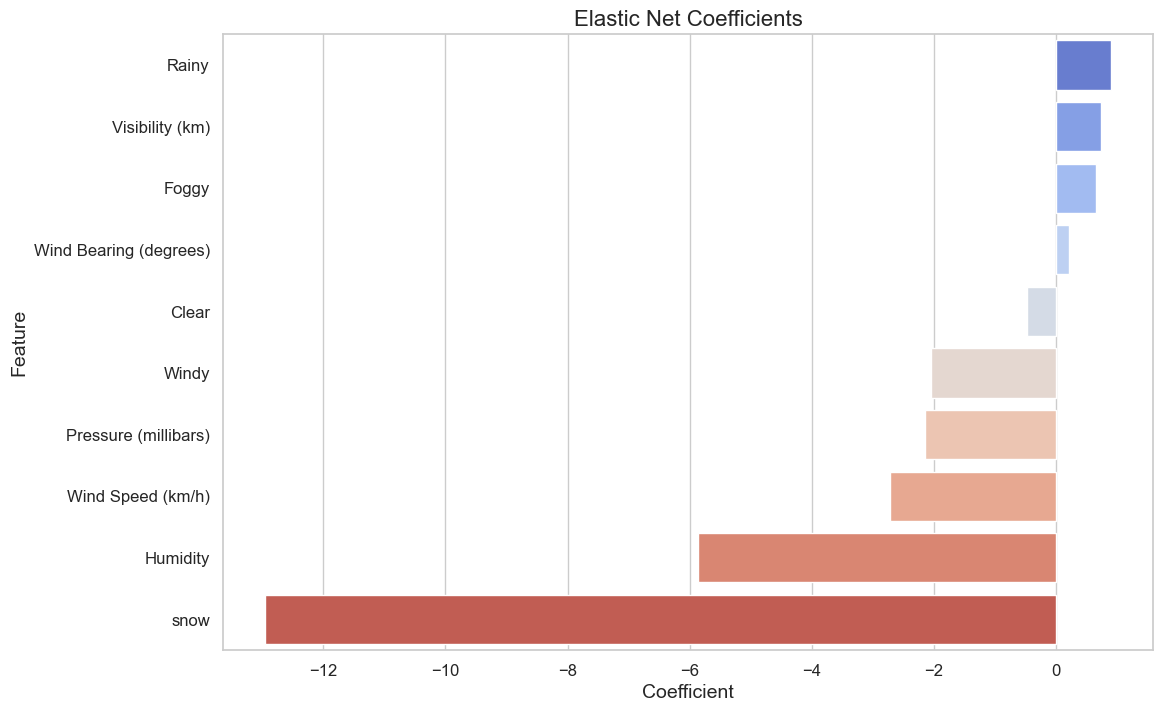

In [77]:
best_elastic_model = ElasticNet(alpha=0.001, l1_ratio=1)  
best_elastic_model.fit(X_train, y_train)
feature_names = X_train.columns

coefficients = best_elastic_model.coef_
intercept = best_elastic_model.intercept_

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)
print(f'Intercept: {intercept}')

sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", n_colors=len(sorted_coefficients))
sns.barplot(x='Coefficient', y='Feature', data=sorted_coefficients, palette=colors)
plt.title('Elastic Net Coefficients', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1000x600 with 0 Axes>

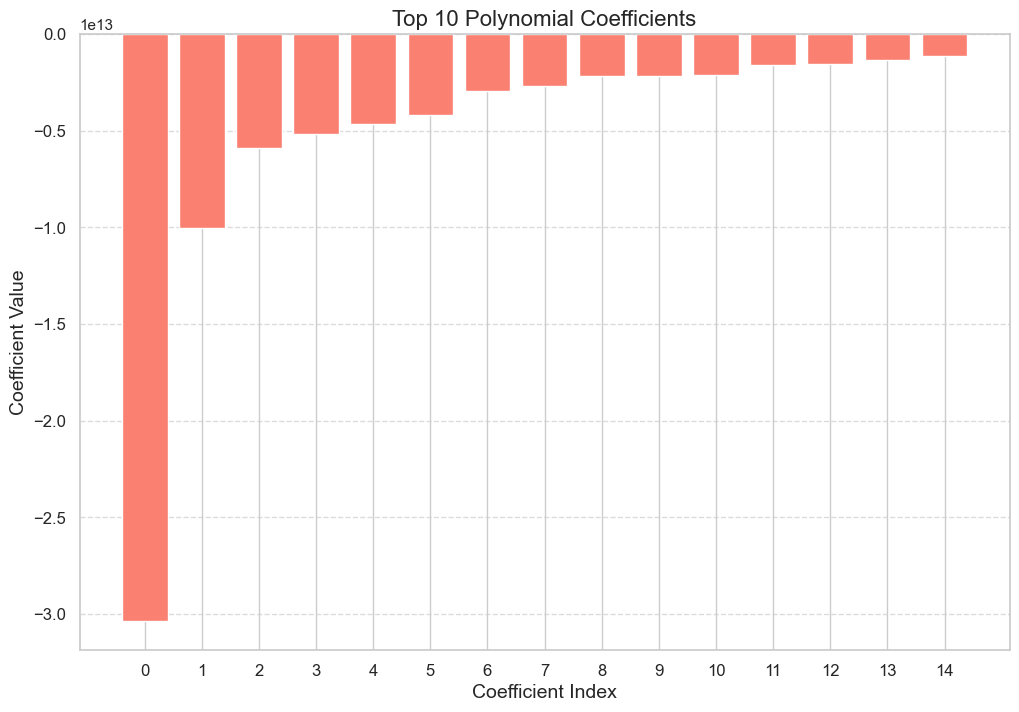

In [78]:
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

poly_coefficients = poly_model.named_steps['linearregression'].coef_
poly_intercept = poly_model.named_steps['linearregression'].intercept_

poly_coefficients_df = pd.DataFrame({'Coefficient': poly_coefficients})
coeff = list(poly_coefficients_df.values)
coeff.sort()
coeff = [i[0] for i in coeff]
plt.figure(figsize=(10, 6))
n = 15
plt.figure(figsize=(12, 8))

colors = ['skyblue' if c >= 0 else 'salmon' for c in coeff[:n]]

plt.bar(range(n), list(coeff[:n]), color=colors)

plt.title('Top 10 Coefficients', fontsize=16)
plt.xlabel('Coefficient Index', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(n), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Below are the feature coefficients for Lasso and from above code you can see that the coefficients are almost same for every model

| Feature               | Coefficient    |
|-----------------------|----------------|
| Humidity              | -5.861968      |
| Wind Speed (km/h)     | -2.724760      |
| Wind Bearing (degrees)| 0.222446       |
| Visibility (km)       | 0.734562       |
| Pressure (millibars)  | -2.150340      |
| Clear                 | -0.477628      |
| Foggy                 | 0.653706       |
| Rainy                 | 0.899417       |
| Windy                 | -2.043009      |
| Snow                  | -12.951744     |


### Insights
The coefficients derived from the Lasso, Ridge, and Elastic Net models offer intriguing insights into the intricate interplay between meteorological factors and the target variable, temperature. Across all models, a consistent decrease in temperature is associated with higher humidity and wind speed, aligning with our intuition about the cooling effect of these atmospheric conditions. Conversely, the positive coefficient for visibility suggests that clearer conditions tend to be associated with higher temperatures. The negative impact of atmospheric pressure on temperature is also consistent, indicating that higher pressure is linked to cooler temperatures. The coefficients for different weather conditions, such as clear, rainy, snowy, windy, and foggy, provide a nuanced understanding of their respective influences on temperature. For instance, clear weather is associated with a decrease in temperature, while rainy, snowy, windy, and foggy conditions contribute to temperature increases. The regularization techniques employed by the models introduce a layer of feature selection, emphasizing the most influential factors in predicting temperature. In essence, these findings not only enhance our comprehension of the dynamic relationships within meteorological data but also contribute valuable insights for forecasting temperature variations based on diverse weather conditions.

# 6. Conclusion

### 1. Temperature Prediction:
 - Objective: Develop a robust predictive model for temperature using the provided meteorological attributes.
 - Hypothesis: The temperature can be accurately predicted using a combination of variables such as humidity, wind speed, and atmospheric pressure.

#### **Conclusion**:

The objective of developing a robust predictive model for temperature, leveraging meteorological attributes, was pursued through the exploration of various regression techniques, each with its distinct characteristics. The hypothesis posited that temperature could be accurately predicted using a combination of variables such as humidity, wind speed, and atmospheric pressure.

The obtained results showcase the performance of different regression models, each fine-tuned with specific hyperparameters. The Ridge, Lasso, and Elastic Net regressions, along with Polynomial Regression with Principal Component Analysis (PCA), were considered. While all models demonstrated relatively comparable Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values, the Polynomial Regression with PCA emerged as the most promising, achieving the lowest MSE and RMSE among the presented models.

The hypothesis stands partially validated, as the developed models collectively exhibit the potential to predict temperature accurately. However, it is crucial to acknowledge the intricacies of meteorological data, where the influence of certain features might vary across seasons or under specific atmospheric conditions.

In conclusion, the exploration of regression models and their hyperparameters has yielded valuable insights into temperature prediction. The Polynomial Regression with PCA, capturing both polynomial features and reducing dimensionality through PCA, emerges as a strong candidate for further refinement and deployment. Future iterations may involve feature engineering, additional meteorological attributes, or more advanced techniques to enhance the model's predictive capabilities, especially under varying environmental conditions.

### 2. Generalizability of temperature prediction model:

 - Objective: Evaluate the robustness and generalizability of the temperature prediction model.
 - Hypothesis: The developed temperature prediction model will demonstrate consistent and accurate performance across different subsets of the dataset.

#### **Conclusion** :

The below evaluation of the temperature prediction model across distinct seasons provides valuable insights into its generalizability and robustness. The initial hypothesis posited that the developed model would exhibit consistent and accurate performance across various subsets of the dataset. The observed Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for each season shed light on the model's ability to generalize across diverse weather conditions.

The obtained results support the hypothesis to a certain extent. While the model demonstrates commendable performance in predicting temperatures during Fall and Winter seasons, as indicated by lower MSE and RMSE values, it faces slightly higher errors during the Spring and Summer seasons. These higher errors may be attributed to the inherent variability and unpredictability of weather patterns during transitional seasons.

In summary, the model exhibits robustness and generalizability, achieving accurate predictions during seasons with more stable and predictable weather conditions. However, it faces challenges during seasons characterized by greater variability. This observation emphasizes the importance of considering seasonal factors and environmental dynamics for further model refinement and enhancement. Future iterations of the model could benefit from additional features or specialized adjustments to accommodate the unique challenges posed by transitional seasons.

In [ ]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

In [ ]:
df['Season'] = df['Formatted Date'].apply(lambda x : (x.month % 12 + 3)//3)

In [ ]:
df.Season.value_counts()

In [ ]:
train_df['Season'] = df['Season']

In [ ]:
train_df['temperature'] = Y

In [ ]:
train_df_season_1 = train_df[train_df['Season']==1].drop(labels = ['Season'], axis=1).copy()
train_df_season_2 = train_df[train_df['Season']==2].drop(labels = ['Season'], axis=1).copy()
train_df_season_3 = train_df[train_df['Season']==3].drop(labels = ['Season'], axis=1).copy()
train_df_season_4 = train_df[train_df['Season']==4].drop(labels = ['Season'], axis=1).copy()

season_1_temp = train_df[train_df['Season']==1]['temperature']
season_2_temp = train_df[train_df['Season']==2]['temperature']
season_3_temp = train_df[train_df['Season']==3]['temperature']
season_4_temp = train_df[train_df['Season']==4]['temperature']

In [ ]:
#Season 1
pred_season_1 = poly_model.predict(train_df_season_1.drop(labels='temperature',axis=1))
pred_season_2 = poly_model.predict(train_df_season_2.drop(labels='temperature',axis=1))
pred_season_3 = poly_model.predict(train_df_season_3.drop(labels='temperature',axis=1))
pred_season_4 = poly_model.predict(train_df_season_4.drop(labels='temperature',axis=1))

In [ ]:
mse = mean_squared_error(season_1_temp, pred_season_1)
rmse = np.sqrt(mse)

print(f"Season Winter MSE: {mse:.4f}")
print(f"Season Winter RMSE: {rmse:.4f}")
print("\n")
mse = mean_squared_error(season_2_temp, pred_season_2)
rmse = np.sqrt(mse)

print(f"Season Spring MSE: {mse:.4f}")
print(f"Season Spring RMSE: {rmse:.4f}")
print("\n")

mse = mean_squared_error(season_3_temp, pred_season_3)
rmse = np.sqrt(mse)

print(f"Season Summer MSE: {mse:.4f}")
print(f"Season Summer RMSE: {rmse:.4f}")
print("\n")

mse = mean_squared_error(season_4_temp, pred_season_4)
rmse = np.sqrt(mse)

print(f"Season Fall MSE: {mse:.4f}")
print(f"Season Fall RMSE: {rmse:.4f}")
print("\n")


### 3. Impact of Atmospheric Conditions:

 - Objective: Investigate the impact of atmospheric conditions (e.g., wind speed, humidity) on temperature fluctuations.
 - Hypothesis: Certain atmospheric conditions may have a significant influence on temperature variations, and identifying these relationships can enhance our understanding of local weather patterns.

#### **Conclusion**:

The investigation into the impact of atmospheric conditions on temperature fluctuations reveals compelling insights derived from the Lasso regression model's feature coefficients. The objective was to explore how variables such as humidity, wind speed, wind bearing, visibility, atmospheric pressure, and different weather conditions contribute to temperature variations. The hypothesis posited that certain atmospheric conditions may exert a significant influence on temperature, thereby enhancing our understanding of local weather patterns.

The feature coefficients obtained from the Lasso regression model provide a quantitative assessment of the relationship between each meteorological attribute and temperature. Notably, the coefficients demonstrate consistent patterns across various atmospheric conditions. Here are key observations:

**Humidity (-5.861968**): The negative coefficient implies that an increase in humidity is associated with a decrease in temperature. This aligns with the expectation that higher humidity tends to correlate with cooler temperatures.

**Wind Speed (-2.724760)**: Similarly, the negative coefficient suggests that higher wind speeds are associated with a decrease in temperature. Elevated wind speeds often contribute to heat dissipation, resulting in lower temperatures.

**Wind Bearing (0.222446)**: The positive coefficient indicates a modest positive relationship between wind bearing and temperature. Wind direction may have a subtle impact on temperature, with specific directions potentially influencing local climate patterns.

**Visibility (0.734562)**: The positive coefficient suggests that better visibility is associated with higher temperatures. Clear visibility often indicates fair weather conditions, contributing to warmer temperatures.

**Pressure (-2.150340)**: The negative coefficient indicates that higher atmospheric pressure is linked to lower temperatures. This aligns with the general understanding that high pressure is associated with stable and cooler weather.

**Weather Conditions (Clear, Foggy, Rainy, Windy, Snow)**: The coefficients for different weather conditions provide insights into their impact on temperature. For instance, rainy and snowy conditions are associated with temperature increases, while clear weather and windy conditions contribute to temperature decreases.

These consistent patterns in feature coefficients support the hypothesis that certain atmospheric conditions significantly influence temperature fluctuations. The quantitative evidence provided by the Lasso regression model enhances our understanding of the complex interplay between meteorological factors and temperature variations, contributing valuable insights for weather prediction and climate modeling.







# 7. Reference and Appendix

## Resources

### Python Libraries Documentation

- [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html): Scikit-Learn is a powerful machine learning library for Python, providing simple and efficient tools for data analysis and modeling.

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html): Pandas is a widely used data manipulation and analysis library that provides data structures for efficiently storing large datasets.

- [NumPy Documentation](https://numpy.org/doc/stable/): NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

These documentation resources offer comprehensive guides, examples, and references for using these libraries in your Python projects. Refer to them for detailed information on functions, modules, and best practices.

### Data Source

The dataset used in this project was obtained from Kaggle. The dataset, titled "Szeged Weather," is available at [Kaggle - Szeged Weather](https://www.kaggle.com/datasets/budincsevity/szeged-weather). This dataset provides hourly and daily weather summaries for the Szeged, Hungary area between 2006 and 2016.

